## Project

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

In [1]:
# Importing the relevant libraries 

import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
raw_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Creating a copy of dataframe for manipulation
bank = raw_data

In [5]:
# Rearranging the columns, dropping the personal loan and adding it to the last column

x = bank['Personal Loan']
bank.drop(['Personal Loan'], axis = 1, inplace = True)
bank['Personal Loan'] = x
bank.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0


## Question 1: 

Read the column description and ensure you understand each attribute well Data Exploration

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# Cheking if any missing value

bank.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
Personal Loan         False
dtype: bool

As evident, no null values evident in the database

In [8]:
## Checking if the Experience can have any negative values and their count

bank[bank['Experience'] <= -1]['Experience'].count()

52

In [9]:
## Cheking the unique numbers of negative count

bank[bank['Experience'] <= -1]['Experience'].unique()

array([-1, -2, -3], dtype=int64)

In [10]:
## Replacing the negative values with null values

bank['Experience'].replace(to_replace=[-1,-2,-3], value = np.nan, inplace = True)

In [11]:
bank['Experience'].isnull().sum()

52

In [12]:
## Filling the null values with median values

bank['Experience'].fillna(bank['Experience'].median(), inplace = True)

Generating a descriptive statistics to summarize the central tendency, dispersion and shape of the dataset distribution

In [13]:
## Taking a look at the data distribution

bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


C:\Users\Sumit Gupta\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Sumit Gupta\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Sumit Gupta\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


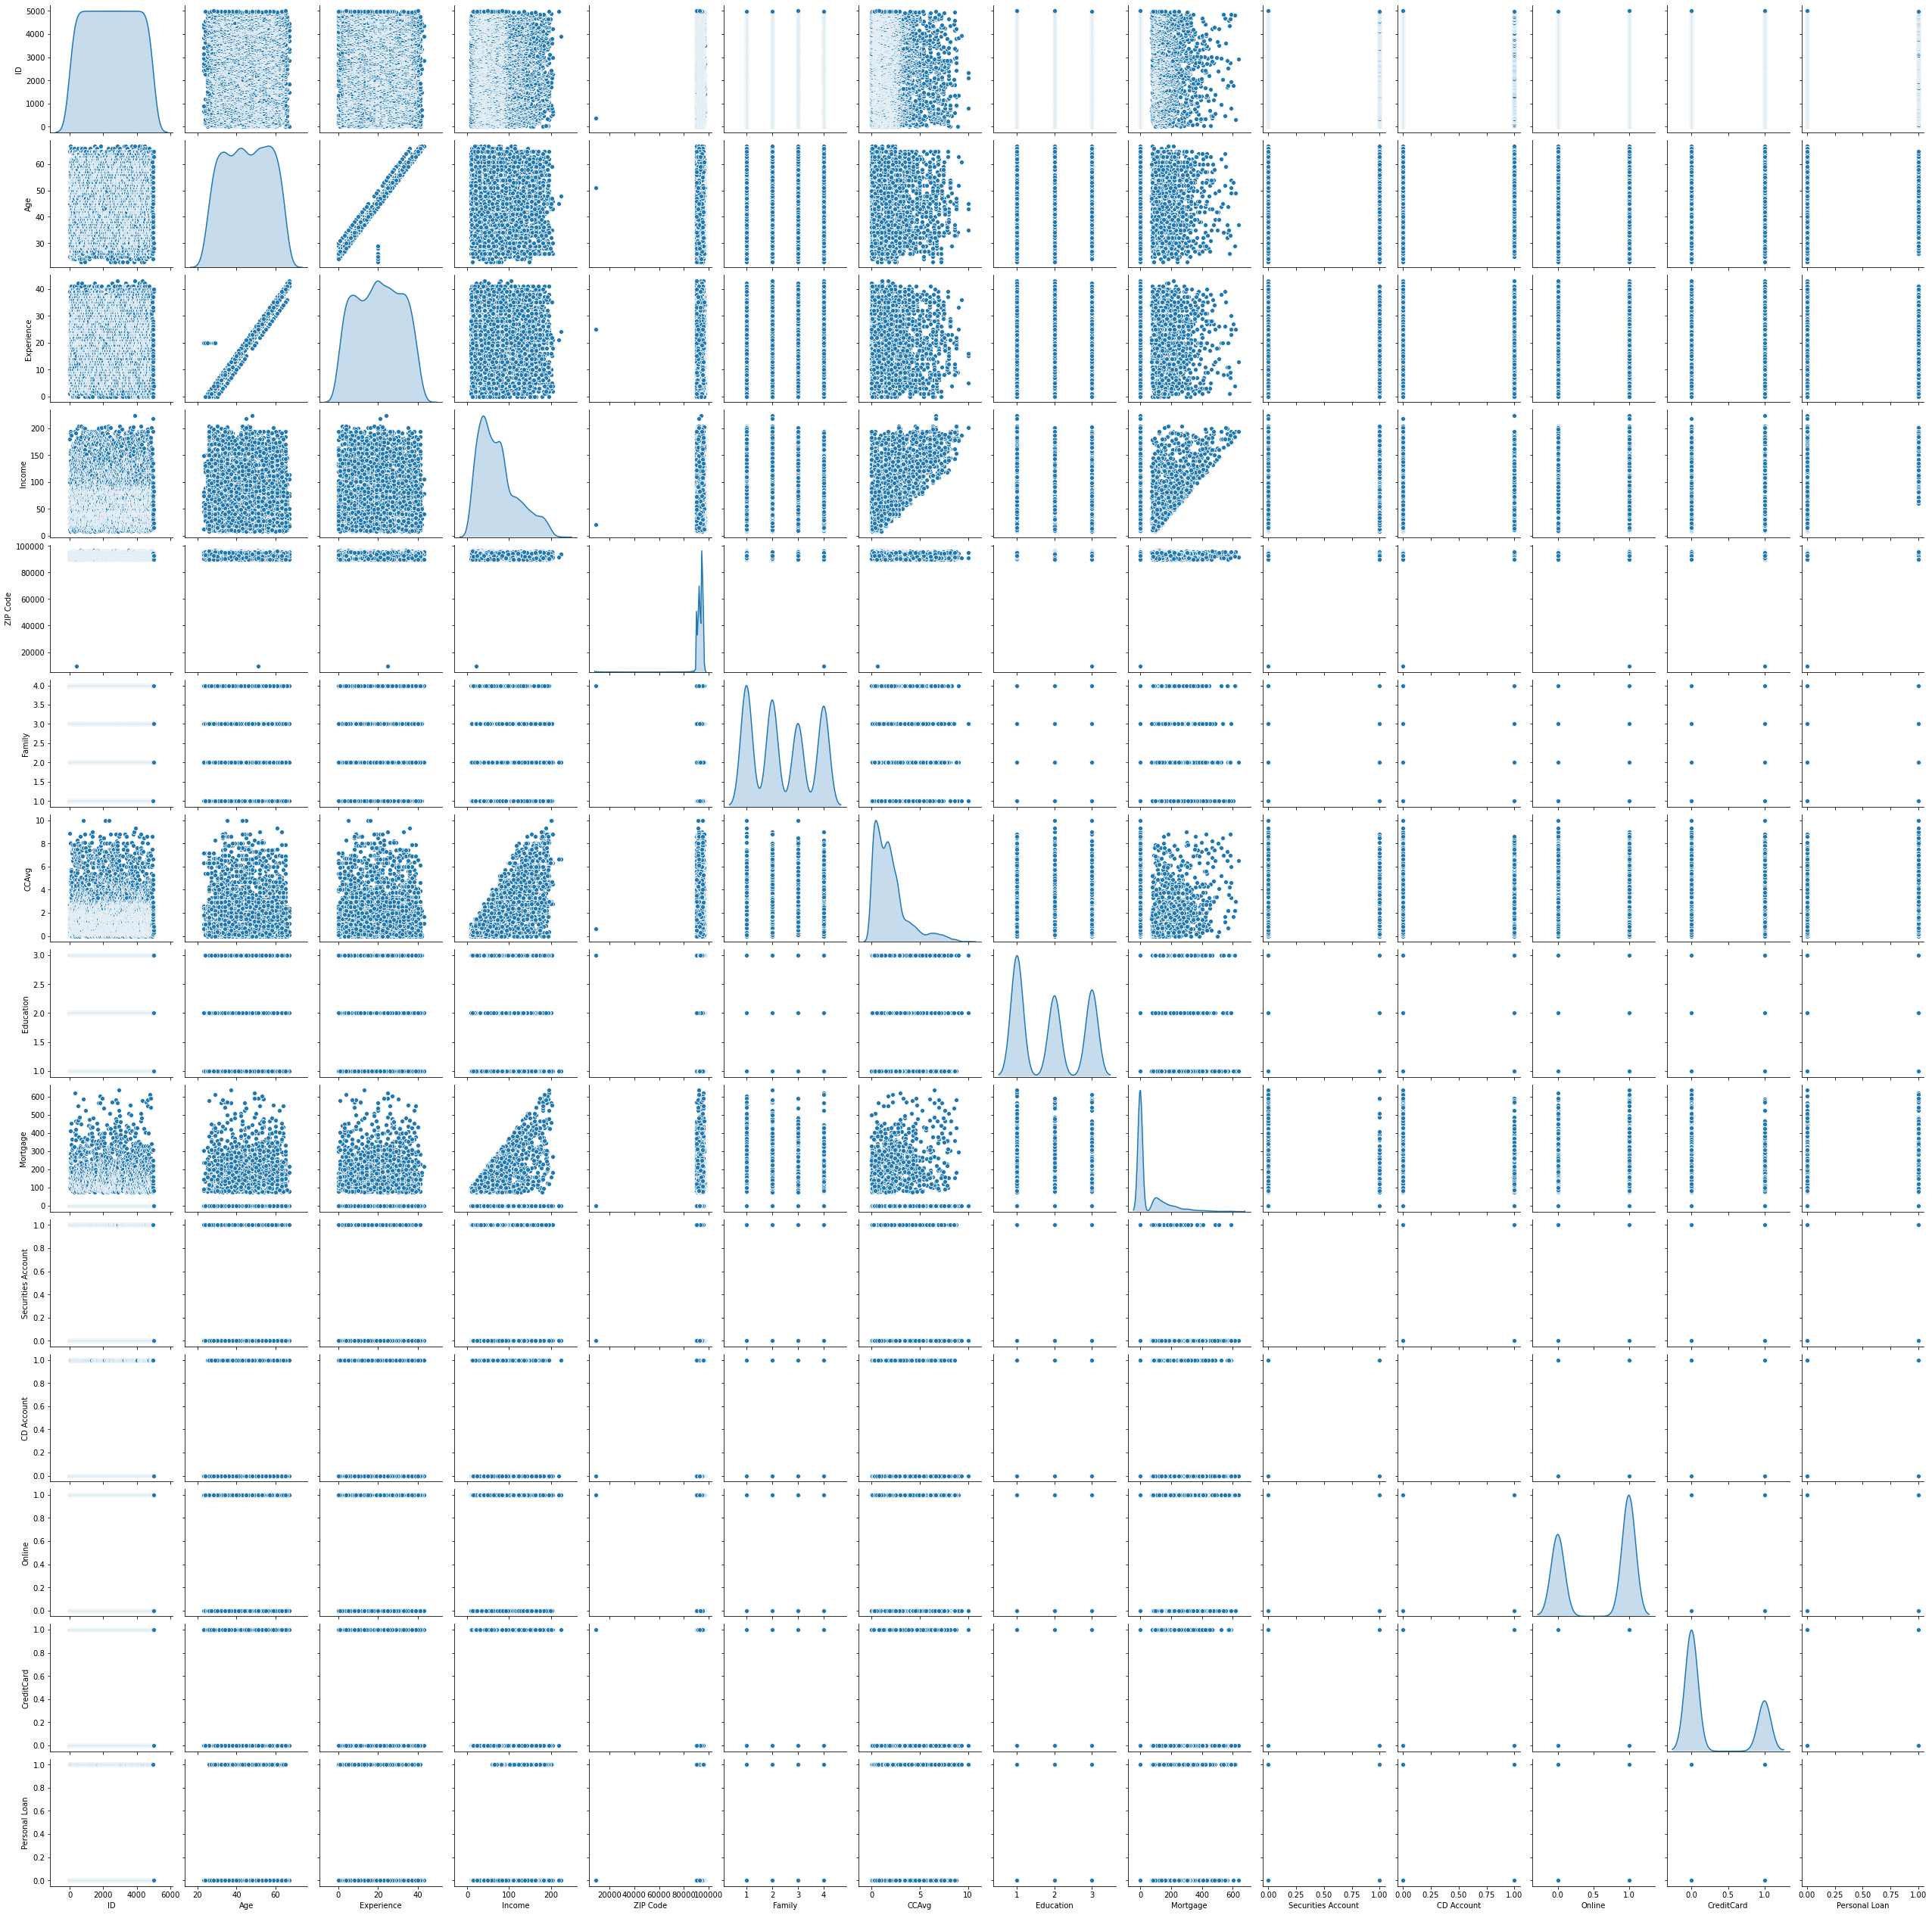

In [14]:
sns.pairplot(data=bank, diag_kind='kde')

## Question2: 

Study the data distribution in each attribute, share your findings. 

1). ID: Though the data distribution is normal, since it isn't providing any useful input, this attribute can be dropped.

2). Age : Three small peaks are indicating three values of age would be occuring more. However, the mean and median of the attribute is equal. The distribution is in considerable shaped.

3). Eductaion : Mean and median are almost equal. Data is finely distributed. A few peaks shows different values dominant in the distribution.

4). Income : We can clearly see data is highly left skewed. Data for less income customers is more in the sample.

5). ZIP Code: Sharp peaks are telling the data from particular places are collected more. More data from different places can be collected. Spread is also quite less in the sample. 

6).Family: It has 4 peaks (i.e - 4 values) , families with lowest members is highest in the sample.

7).Mortage: This attribute is highly left skewed with a very high peak on the left telling us that most customer are having least mortage while a very few have some mortage.

8).Securities Account : This attributes tells us that majorly cutomers are not having Security account.

9).CD account: Most of the customers dont have CD accounts.

10).Online: Higher number of customers use online banking in the sample.

11).Credit Card: This attribute has less customers using CC in comparison to the CC users.

## Relationship between Experience and age is found to be a linear relationship. If one attribute is dropped, it will not hamper the accuracy of the model.



In [15]:
bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.000465,0.005526,0.013459,0.008834,-0.014013
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.024675,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.016972,-0.000436,-0.000465,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


## Question 3: 
Get the target distribution

In [16]:
# 0 = didnt take loan in the last campaign (90.4%)
# 1 = took loan in the last campaign (9.6%)

bank['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

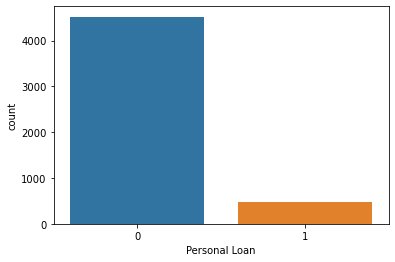

In [17]:
sns.countplot(bank['Personal Loan'])

In [18]:
Unsubscribers_count = len(bank[bank['Personal Loan'] == 0])
print('Unsubscribers Count:', Unsubscribers_count)

Subscribers_count = len(bank[bank['Personal Loan'] == 1])
print('Subscribers Count:', Subscribers_count)

Pct_no_subs = Unsubscribers_count / (Unsubscribers_count + Subscribers_count)

print('Percentage of No subscription :', Pct_no_subs*100)
print('Percentage of subscription :', (1- Pct_no_subs)*100)

Unsubscribers Count: 4520
Subscribers Count: 480
Percentage of No subscription : 90.4
Percentage of subscription : 9.599999999999998


## Looking into the dataset to various attributes with relation to the target 

In [19]:
bank.groupby(bank['Personal Loan']).mean().T

Personal Loan,0,1
ID,2512.165487,2390.650000
Age,45.367257,45.066667
Experience,20.378982,19.843750
Income,66.237389,144.745833
ZIP Code,93152.428761,93153.202083
Family,2.373451,2.612500
CCAvg,1.729009,3.905354
Education,1.843584,2.233333
Mortgage,51.789381,100.845833
Securities Account,0.102212,0.125000


## Observations: 

1). Average Income of customers who took loan is more than double of the avg income of customers who didn’t take loan last year.

2). The Avg. spending on credit cards per month is also more than double for the customer's who took loan.

3). The average mortage for loan availing customers is almost double for the not availing customers.

4). Avg literacy is less for non loan takers.

In [20]:
## Looking at the characteristics where variance is less than 1

var = bank.var()

var[var<1]

Education             0.705380
Securities Account    0.093519
CD Account            0.056763
Online                0.240678
CreditCard            0.207606
Personal Loan         0.086801
dtype: float64

Since experience and age is having a good corelation, we can drop either one of them. Target is having better relation with Income.

In [21]:
bank.drop(columns = 'Experience', inplace = True)
bank.drop(columns = 'ID', inplace = True)

In [22]:
bank.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1,0


## Question 4: 
Split the data into training and test set in the ratio of 70:30 respectively.

In [23]:
array = bank

A = array.iloc[:, 0:11]
B = array.iloc[:, 11]

In [24]:
standardized_A = preprocessing.scale(A)
standardized_A

array([[-1.77441684, -0.53822878, -0.96411408, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.8641094 , -1.44393158, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -1.36379301,  0.73881384, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033, -1.08136314, -0.0610391 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965, -0.53822878, -1.46985492, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285,  0.20043396, -0.25475717, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [25]:
#normalize the data attributes
normalized_A = preprocessing.normalize(A)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.30, random_state=1)

## Question 5: 
Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

## Building Logistic Regression Model

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Predicting the test set results and calculating the accuracy

In [28]:
y_pred = log_reg.predict(X_test)

In [29]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 0.91
Accuracy of logistic regression classifier on test set: 0.91


Confusion Matrix

In [30]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1318   33]
 [ 105   44]]


Compute precision, recall, F-measure and support

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.30      0.39       149

    accuracy                           0.91      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.89      0.91      0.89      1500



Interpretation: Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 74% of the customer’s preferred term deposits that were promoted.

## ROC Curve

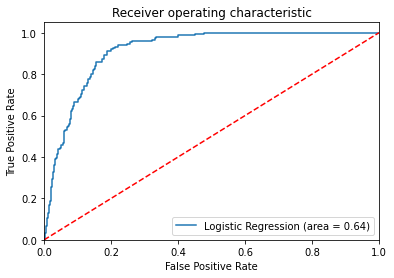

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [33]:
import statsmodels.api as sm
logit_model=sm.Logit(B,A)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.130922
         Iterations 9
                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.586    
Dependent Variable:  Personal Loan     AIC:               1331.2237
Date:                2020-10-04 20:19  BIC:               1402.9128
No. Observations:    5000              Log-Likelihood:    -654.61  
Df Model:            10                LL-Null:           -1581.0  
Df Residuals:        4989              LLR p-value:       0.0000   
Converged:           1.0000            Scale:             1.0000   
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                 0.0056   0.0064   0.8788 0.3795 -0.0069  0.0182
Income              0.0534   0.0026  20.9

The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them.

In [34]:
#Again check.

#logit_model=sm.Logit(y,X)
#result=logit_model.fit()
#print(result.summary2())

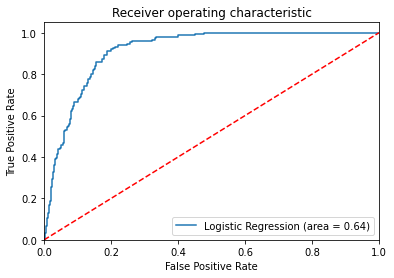

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Building KNN Model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred = classifier.predict(X_test)

In [38]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 0.92
Accuracy of logistic regression classifier on test set: 0.90


In [60]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1241  110]
 [  65   84]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.43      0.56      0.49       149

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



In [52]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

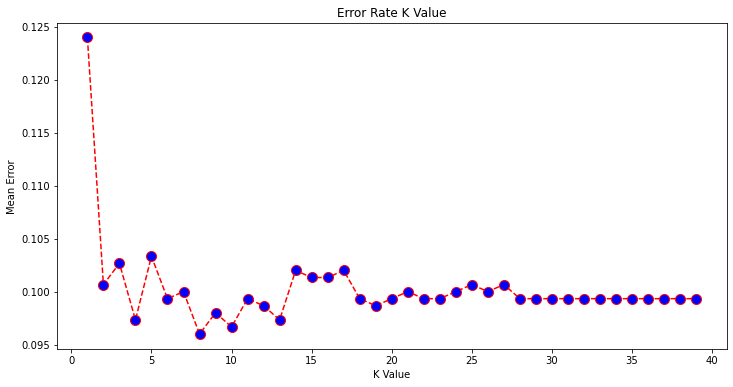

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Naive Bayes Classification

In [55]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [56]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

Evaluating Model

In [57]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred))

Accuracy on test set: 0.8833333333333333


Text(91.68, 0.5, 'predicted label')

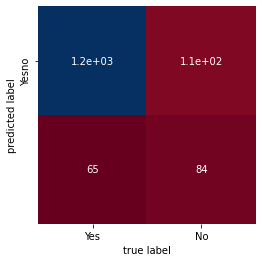

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,xticklabels=['Yes', 'No'], yticklabels=['Yes' 'no'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.43      0.56      0.49       149

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



## Question 7: 
Give your reasoning on which is the best model in this case and why it performs better?

The logistic Regression model is the best as the accuracy of the train and test set is almost similar and also the precsion and recall accuracy is good. The confusion matrix is also better in comparision to other models.

The requirement is to classify the target. The KNN is distance based which not perfect for this situation.Though the accuracy is good but confusion matrix tells that is correct predictions is not that much acceptable.

The Naive Bayes giving the accuracy less in comaprision to other models meaning the probability of determing the target correctly is less.